NAME: Paul
SURNAME: Reitz

# Covid-19 Movement Data Analysis in South Africa 

### Introduction
- Covid-19 has been around for more than half a year and there has been alot of data gathered. The data on death rates, recoveries, total cases , testing and health facility data has been thoroughly analysed and processed. I believe focusing on these aspects won't give any new nuanced insights without using advanced machine learning techniques.  

For this reason I chose to use data gathered from Google Maps API's about population movement(percentage change per day in a few key sectors) across South Africa from just before the onset of Lockdown in South Africa to recent times. I am chosing to compare data of Gauteng and the Western Cape (the two biggest economic hubs of South Africa).

### The Data:
Reference to the data:

-Data Science for Social Impact Research Group @ University of Pretoria, Coronavirus COVID-19 (2019-nCoV) Data Repository for South Africa. Available on: https://github.com/dsfsi/covid19za.

Github repository path:

-covid19za/data/mobility/google_mobility/mobility_report_ZA.csv

Direct Google csv link:
https://www.google.com/covid19/mobility/


**VERY IMPORTANT: SAVE THE CSV FILES IN THE SAME DIRECTORY AS THE NOTEBOOK**

### Why I think this data is accurate:
-The data is gathered in a automated way , this data is based on time series analysis of aggregated individual movements using data from Google Maps API processes. This eliminates a large component of possible human error in the dtata gathering phase. 

-The data has already been largly processed by a well accreditied group of academics and data scientists namely, the Data Science for Social Impact Research Group @ University of Pretoria. Hence not much of a need for complex SQL queries.

## Imported packages:



In [64]:
library(readr)
library(ggplot2)
library(sqldf)
library(RH2)
library(lubridate)
install.packages("tidyr")
library(tidyr)
library(caret)
library(dplyr)
library(tidyverse)
install.packages("scales")
library(scales)

Installing package into 'C:/Users/paulr/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

also installing the dependencies 'rlang', 'vctrs'




package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\paulr\OneDrive\Documents\R\win-library\3.6\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\paulr\OneDrive\Documents\R\win-library\3.6\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'vctrs' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'vctrs'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\paulr\OneDrive\Documents\R\win-library\3.6\00LOCK\vctrs\libs\x64\vctrs.dll to C:\Users\paulr\OneDrive\Documents\R\win-library\3.6\vctrs\libs\x64\vctrs.dll: Permission denied"
Warning message:
"restored 'vctrs'"


package 'tidyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\paulr\AppData\Local\Temp\RtmpANg1hm\downloaded_packages


Warning message:
"package 'tidyr' was built under R version 3.6.3"


ERROR: Error: package or namespace load failed for 'tidyr' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'vctrs' 0.2.4 is already loaded, but >= 0.3.0 is required


## Importing the necessary data:



In [80]:
mobility <- read.csv("mobility_report_ZA.csv") 

## Data Wrangling For Gauteng

<br>

Consider the mobility dataset. The mobility dataset is loaded into the object **mobility**.

<br>

Firstly we will look at only the data for Gauteng. I am doing this to decrease variability in the data sothat I can better find clusters.


In [166]:
mobility_Gauteng <- sqldf("select *
from mobility
where province like '%Gauteng%'
Order by date")

head(mobility_Gauteng)


,province,date,retail.and.recreation,grocery.and.pharmacy,parks,transit.stations,workplaces,residential
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Gauteng,2020-02-15,8,0,25,1,2,-3
2,Gauteng,2020-02-16,2,-1,10,-6,0,0
3,Gauteng,2020-02-17,-8,-8,0,3,5,1
4,Gauteng,2020-02-18,-10,-12,1,1,5,1
5,Gauteng,2020-02-19,-11,-12,-5,-1,4,1
6,Gauteng,2020-02-20,-2,-5,1,2,4,-1


[1] "data.frame"

          province           date     retail.and.recreation
 Gauteng      :220   2020-02-15:  1   Min.   :-81.00       
 Eastern Cape :  0   2020-02-16:  1   1st Qu.:-50.00       
 Free State   :  0   2020-02-17:  1   Median :-31.50       
 KwaZulu-Natal:  0   2020-02-18:  1   Mean   :-34.07       
 Limpopo      :  0   2020-02-19:  1   3rd Qu.:-20.75       
 Mpumalanga   :  0   2020-02-20:  1   Max.   : 24.00       
 (Other)      :  0   (Other)   :214   NA's   :36           
 grocery.and.pharmacy     parks        transit.stations   workplaces    
 Min.   :-61.00       Min.   :-68.00   Min.   :-85.00   Min.   :-87.00  
 1st Qu.:-24.25       1st Qu.:-47.00   1st Qu.:-63.25   1st Qu.:-46.00  
 Median :-12.00       Median :-34.00   Median :-51.00   Median :-38.00  
 Mean   :-15.46       Mean   :-31.78   Mean   :-47.45   Mean   :-32.95  
 3rd Qu.: -4.00       3rd Qu.:-18.00   3rd Qu.:-41.75   3rd Qu.: -9.75  
 Max.   : 68.00       Max.   : 25.00   Max.   : 21.00   Max.   :  9.00  
 NA's   :

[1] "province"              "date"                  "retail.and.recreation"
[4] "grocery.and.pharmacy"  "parks"                 "transit.stations"     
[7] "workplaces"            "residential"

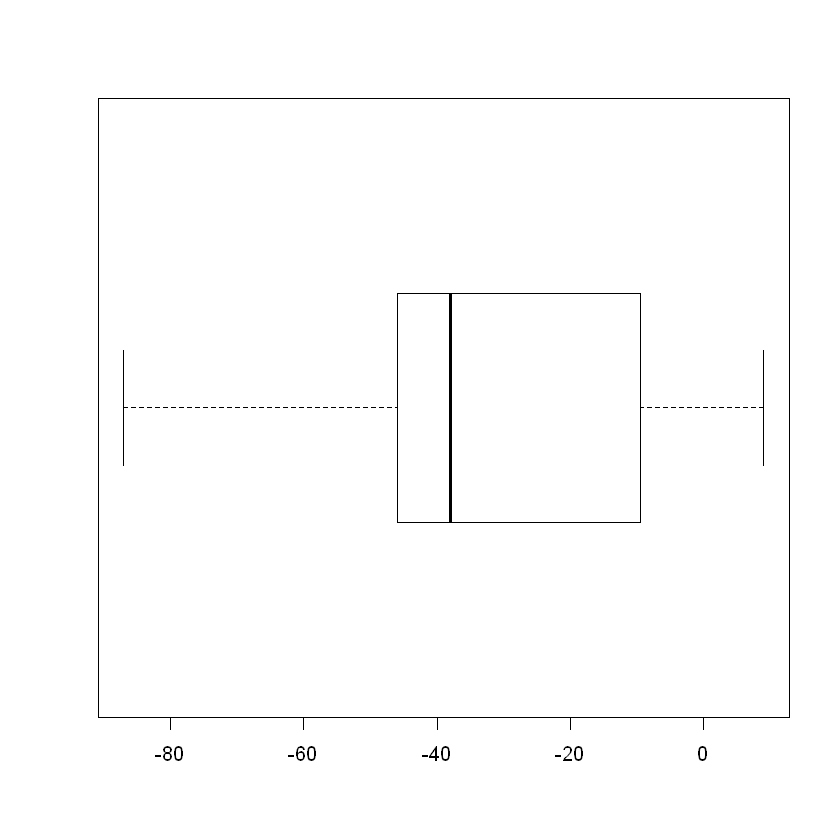

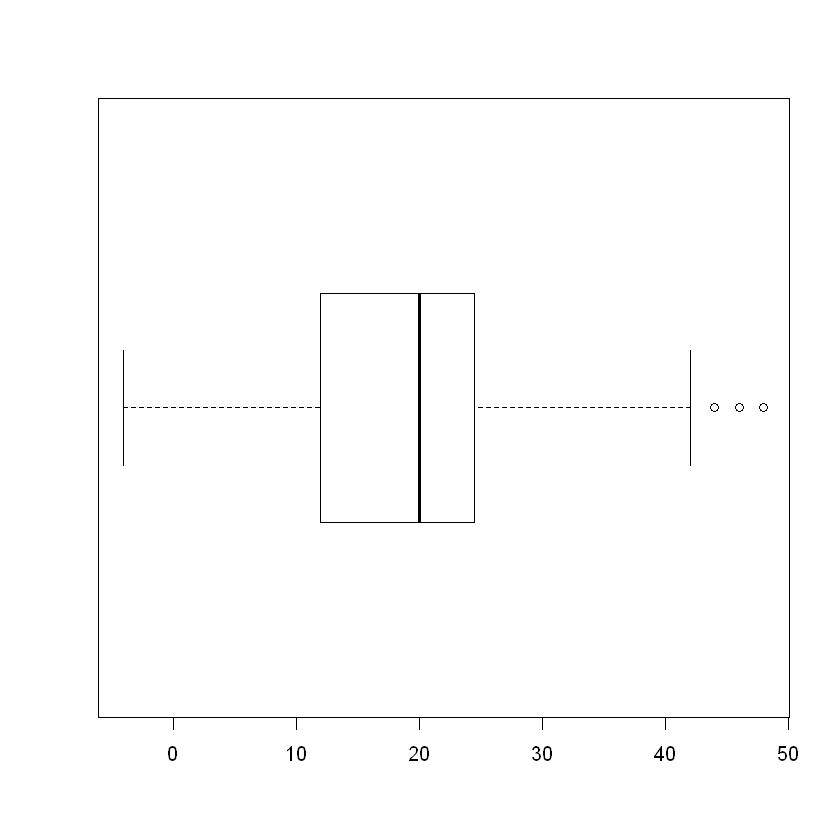

In [155]:

class(mobility_Gauteng)
summary(mobility_Gauteng)
names(mobility_Gauteng)

boxplot(mobility_Gauteng$workplaces, horizontal=TRUE)
boxplot(mobility_Gauteng$residential, horizontal=TRUE)



## Findings:

-There are no NA values in the workplaces and residential column.

-Residential values are skewed to the right and there seems to be some outlier values. This might affect the accuracy of the output. 

-Workplaces values are skew to the left. Shows a disproportionate tendency in the data.


### Plots of Gauteng Workplace and Residential daily percentage movement change since start of COVID-19 lockdown


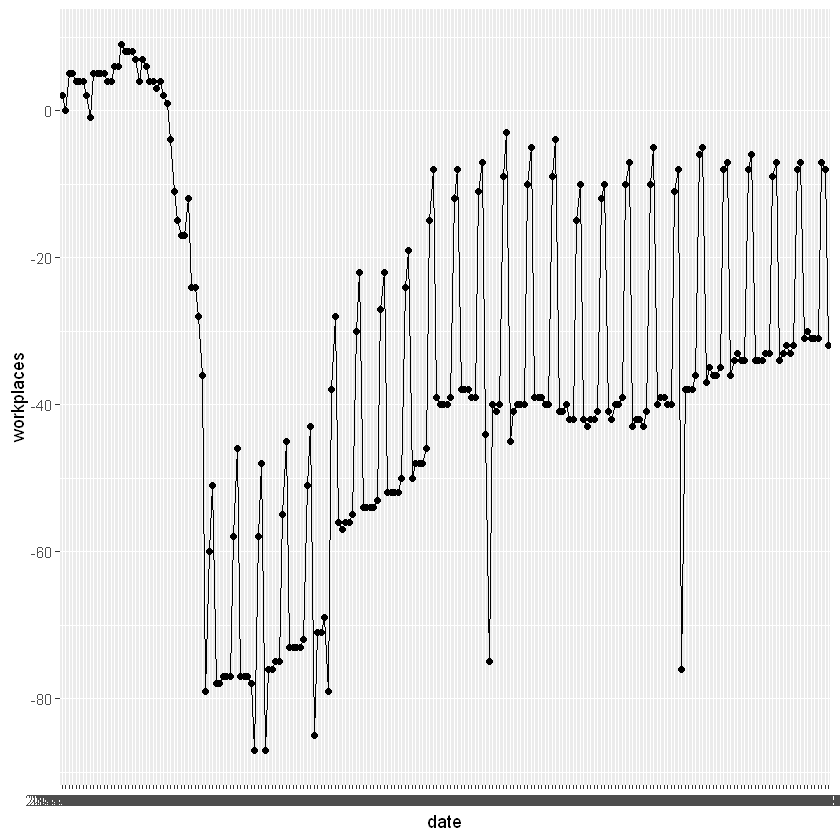

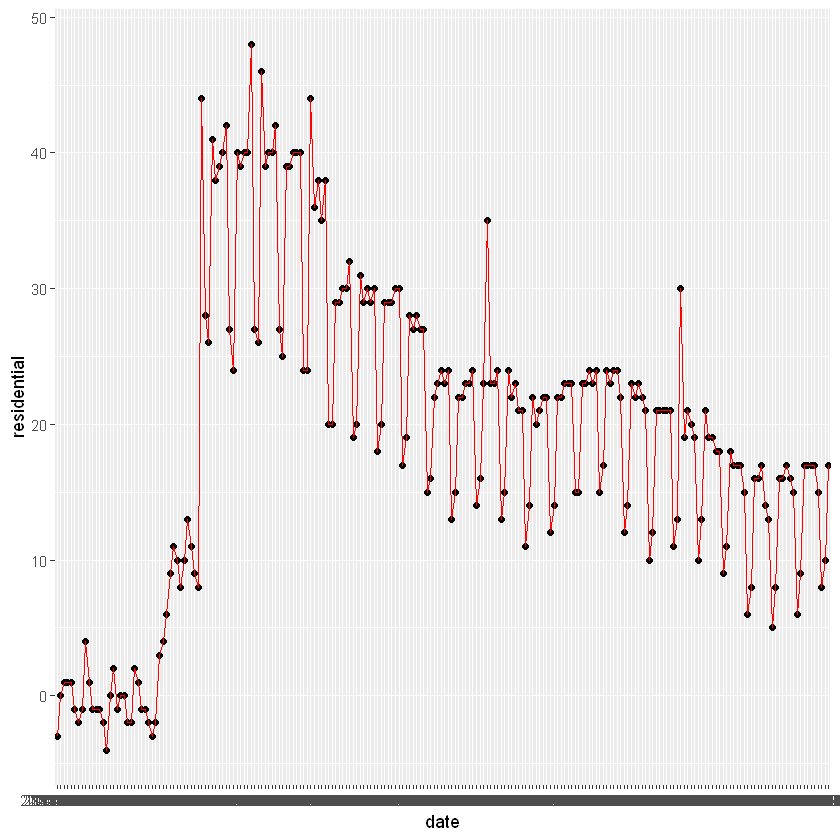

In [61]:
ggplot(data = mobility_Gauteng, 
       mapping = aes(x =  date, 
                     y = workplaces)
      ) + 
  geom_point() +
  geom_line(aes(group=1),color='black')

ggplot(data = mobility_Gauteng, 
       mapping = aes(x =  date, 
                     y = residential)
      ) + 
  geom_point() +
  geom_line(aes(group=1),color='red')


## Graph explanation:
-First (black) graph is the graph of Gauteng Workplace daily percentage movement change since start of COVID-19 lockdown.

-Graph starts at 0% value on 15/02/2020. And moves to a negative region and stays there. The data hasnt normalised back to the basis start point of 0%.

-
    
-Second (red) graph is the graph of Gauteng residential daily percentage movement change since start of COVID-19 lockdown.

-Graph starts at 0% value on 15/02/2020. And moves to a positive region and stays there. The data hasnt normalised back to the basis start point of 0% as of yet.

## K-means Data morphing
<br>
<br>

In [167]:
mobility_Kmeans_Gauteng<- sqldf("SELECT residential, workplaces
FROM mobility
where province like '%Gauteng%' 
 Order by date")

head(mobility_Kmeans_Gauteng)

,residential,workplaces
,<dbl>,<dbl>
1,-3,2
2,0,0
3,1,5
4,1,5
5,1,4
6,-1,4


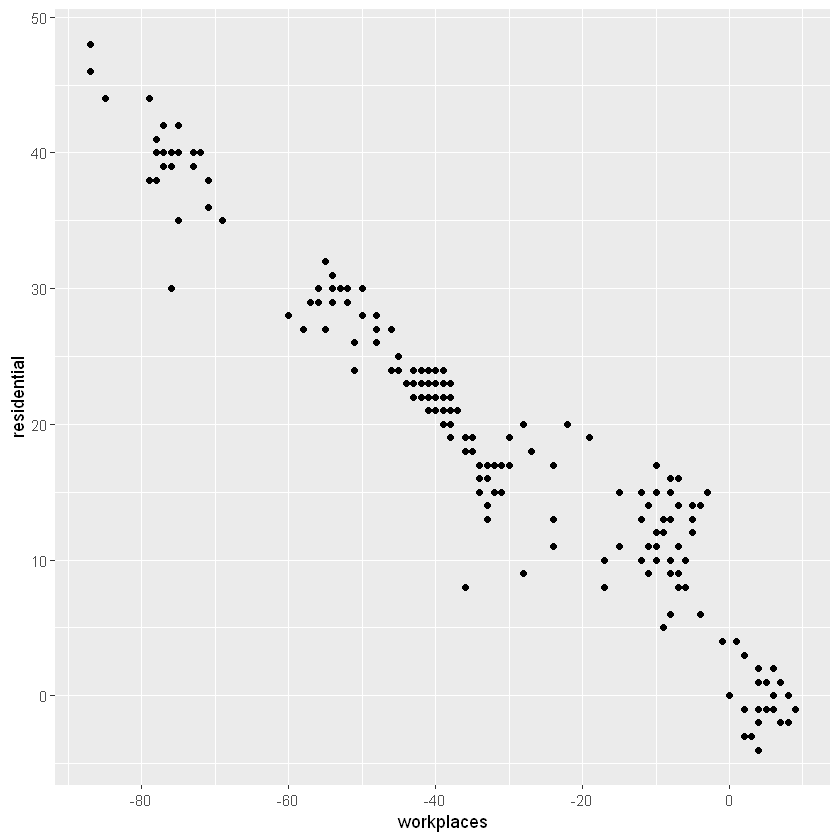

In [168]:
ggplot(mobility_Gauteng, aes(x=workplaces , y=residential ))+ geom_point()

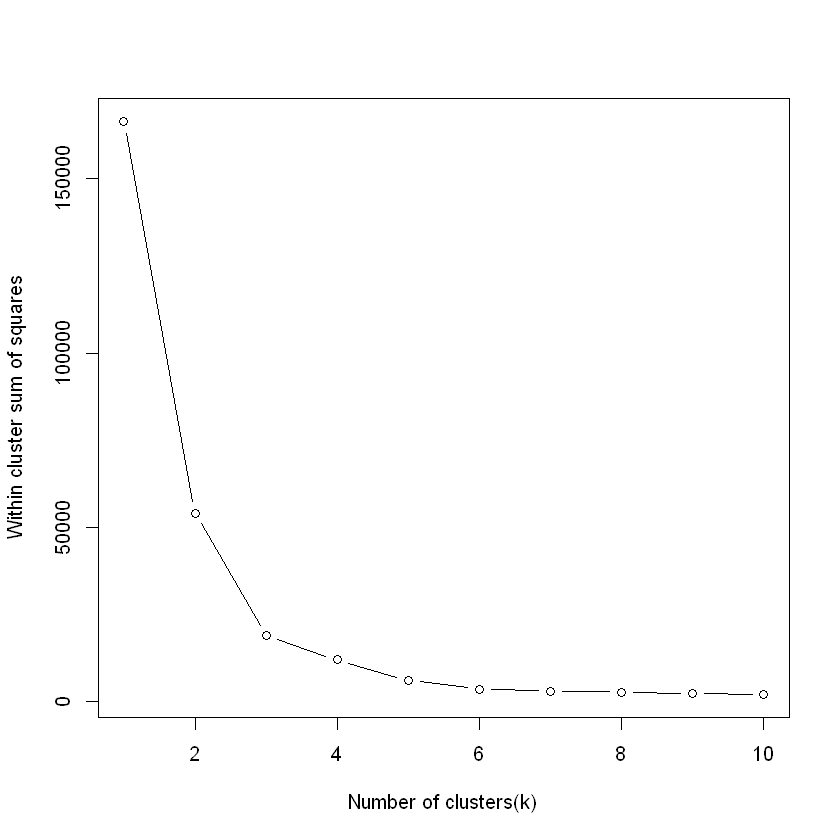

In [169]:
set.seed(71)
k.max <- 10
wss<- sapply(1:k.max,function(k){kmeans(mobility_Kmeans_Gauteng,k,nstart = 20,iter.max = 20)$tot.withinss}) #skree plot
plot(1:k.max,wss, type= "b", xlab = "Number of clusters(k)",
     ylab = "Within cluster sum of squares")

### Cluster choice

From the skree plot we can see from a K value of 6 there is deminishing preformance gains from choosing an higher value for K. The Skree plot displays diminshing margins of optimisation from a k value of 6. If any higher value is chosen there is a danger that we would be overfitting the model. The plot also shows 6 distinct groupings of the data. 
So a K value of 6 would be optimal.

### Applying the K-means Algorithm to mobility_Kmeans data
<db>

In [170]:
set.seed(21)
k_means1 <- kmeans(mobility_Kmeans_Gauteng, centers = 6, nstart = 20)
print(k_means1)


K-means clustering with 6 clusters of sizes 31, 26, 41, 36, 58, 28

Cluster means:
  residential workplaces
1  -0.3225806   4.516129
2  28.5000000 -53.153846
3  11.6585366  -9.268293
4  16.3333333 -31.444444
5  22.5000000 -40.586207
6  39.7142857 -76.464286

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   3   3   3   3   3   3   4   4   4 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  4   6   2   2   6   6   6   6   6   2   5   6   6   6   6   6   2   2   6   6 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  6   6   6   2   5   6   6   6   6   6   2   5   6   6   6   6   6   5   4   2 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  9

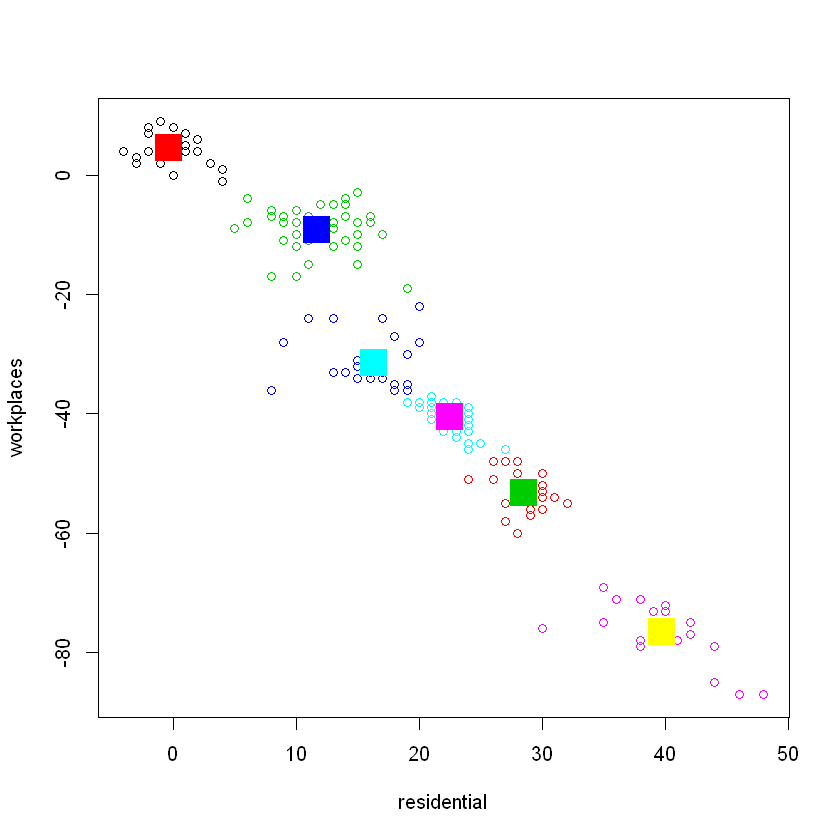

In [171]:
plot(mobility_Kmeans_Gauteng, col=k_means1$cluster)
points(k_means1$centers[,c("residential", "workplaces")], col=10:40, pch=15, cex=3)

### Interpretation

<br>

Essentially, between_SS measures the variation between all clusters. The larger the between_SS value is the higher percentage the (between_SS / total_SS =  97.8  %) metric will have. So here we can see that the model is quite accurate with a score of 97.8 %. This means that between_SS is a large value. This means that the clusters are far separatd from eachother and that the model predicted the classes well. 

The K-means program found 6 clusters in Gauteng when we look at residential movement vs workplaces movement. We can also see that there is a negative linear relationship between residential and workplaces movements. So people in Gauteng usually have work places that are separate from residential places. Also from the prior graphes we can see that there hase been a clear separation of residential(+) and workplaces(-) from the basis point of 0% on 15/02/2020. This shows that there has been more of a movement away from traditional workplaces and more people are at home as expected. There seems to have occured a fundamental shift in how people move in the economy due to COVID in Gauteng. This might be to a rise in unemplyment or just the lockdown level changing over time. The most interesting thing in this data is the fact that there are these 6 clusters. These clusters are more localised to the top left of the graph(this is some sort of indication of a trend or pattern). This shows that there is a tendency in Gauteng for economic activity to recover because there is more of a shift for residential and workplaces movement to the basis of 0% change. If there will be a move to 0%, only  time and more data will tell but it is clear that the severity of movement away from work is greater than the movement to residential areas.

<db>
    
<db>
    
<db>

## Data Wrangling For Western Cape

<br>

Consider the mobility dataset. The mobility dataset is loaded into the object **mobility**.

<br>

 We will now look at only the data for Western Cape. 


,province,date,retail.and.recreation,grocery.and.pharmacy,parks,transit.stations,workplaces,residential
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Western Cape,2020-02-15,-2,-1,4,-3,0,-1
2,Western Cape,2020-02-16,-9,-2,-25,-7,-2,-1
3,Western Cape,2020-02-17,-10,-9,-15,5,4,0
4,Western Cape,2020-02-18,-10,-11,-4,4,4,0
5,Western Cape,2020-02-19,-9,-9,7,3,4,-1
6,Western Cape,2020-02-20,-7,-7,0,3,3,-1


[1] "data.frame"

          province           date     retail.and.recreation
 Western Cape :220   2020-02-15:  1   Min.   :-86.00       
 Eastern Cape :  0   2020-02-16:  1   1st Qu.:-60.00       
 Free State   :  0   2020-02-17:  1   Median :-43.00       
 Gauteng      :  0   2020-02-18:  1   Mean   :-42.77       
 KwaZulu-Natal:  0   2020-02-19:  1   3rd Qu.:-31.00       
 Limpopo      :  0   2020-02-20:  1   Max.   : 13.00       
 (Other)      :  0   (Other)   :214   NA's   :36           
 grocery.and.pharmacy     parks        transit.stations   workplaces    
 Min.   :-67.00       Min.   :-87.00   Min.   :-89.00   Min.   :-88.00  
 1st Qu.:-34.00       1st Qu.:-72.00   1st Qu.:-73.00   1st Qu.:-51.25  
 Median :-22.00       Median :-49.00   Median :-63.00   Median :-38.00  
 Mean   :-22.75       Mean   :-47.62   Mean   :-55.23   Mean   :-35.73  
 3rd Qu.:-11.00       3rd Qu.:-30.00   3rd Qu.:-56.00   3rd Qu.:-18.00  
 Max.   : 60.00       Max.   :  8.00   Max.   : 14.00   Max.   :  8.00  
 NA's   :

[1] "province"              "date"                  "retail.and.recreation"
[4] "grocery.and.pharmacy"  "parks"                 "transit.stations"     
[7] "workplaces"            "residential"

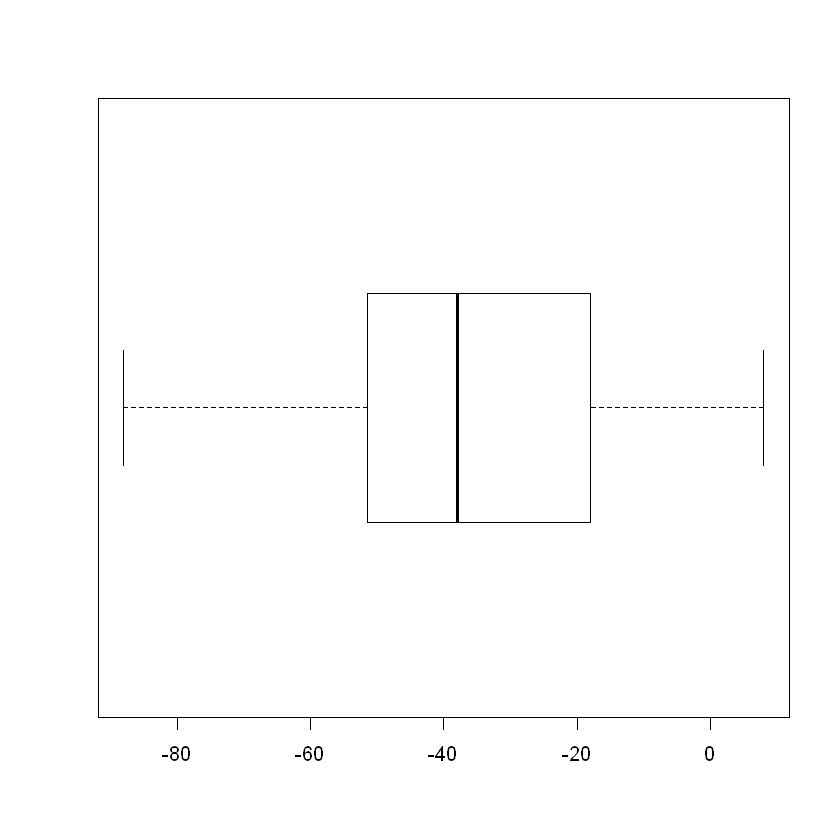

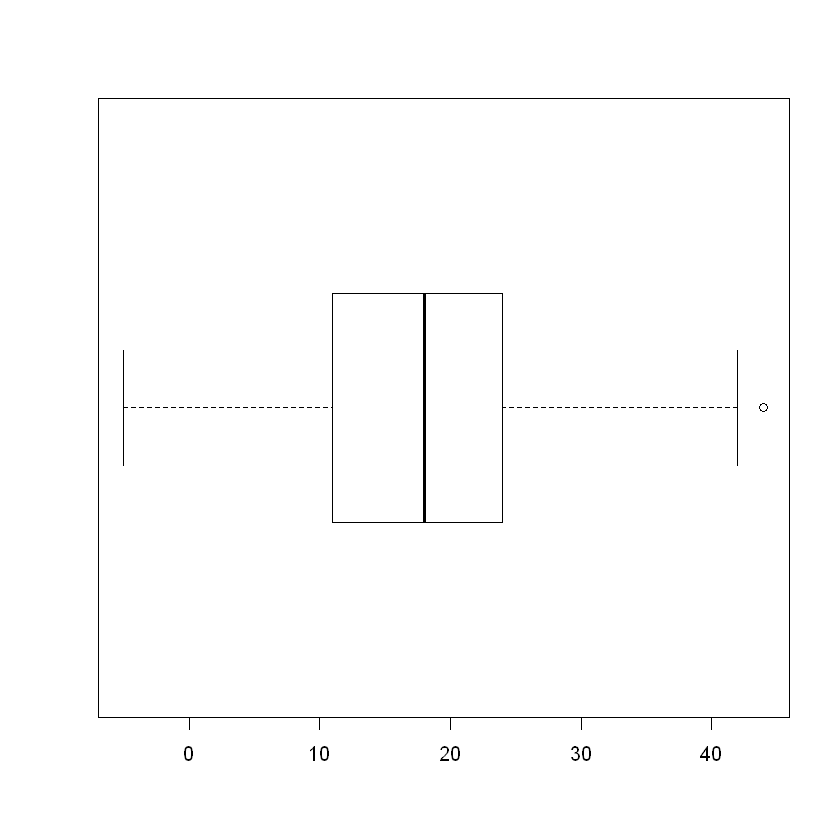

In [172]:
mobility_western_cape<- sqldf("select *
from mobility
where province like '%Western Cape%'
order by date")
head(mobility_western_cape)


class(mobility_western_cape)
summary(mobility_western_cape)
names(mobility_western_cape)

boxplot(mobility_western_cape$workplaces, horizontal=TRUE)
boxplot(mobility_western_cape$residential, horizontal=TRUE)

### Plots of Western Cape Workplace and Residential daily percentage movement change since start of COVID-19 lockdown 

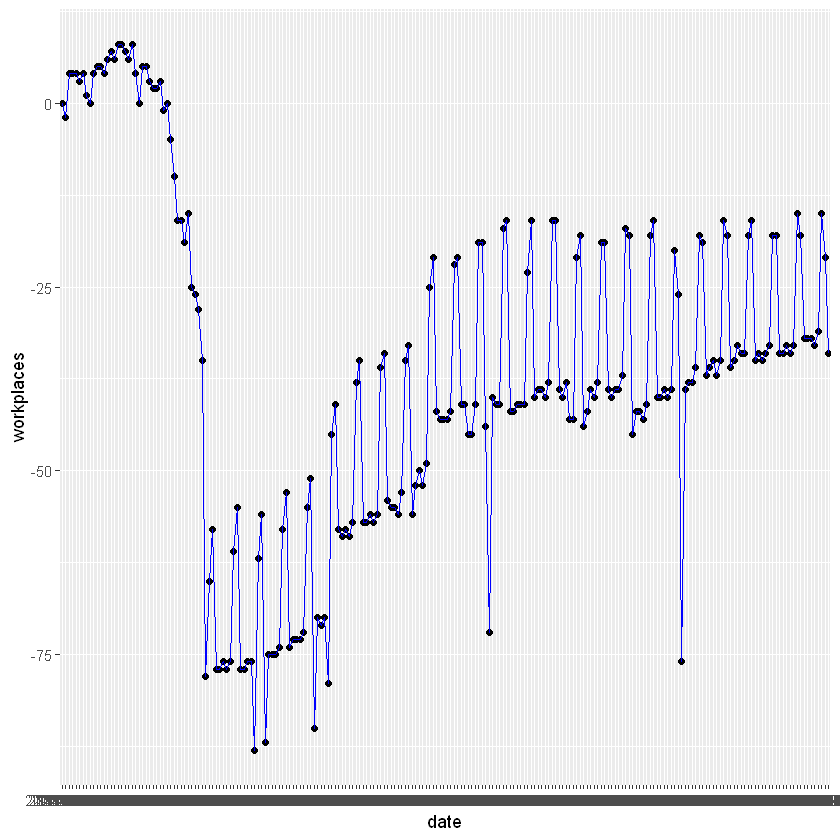

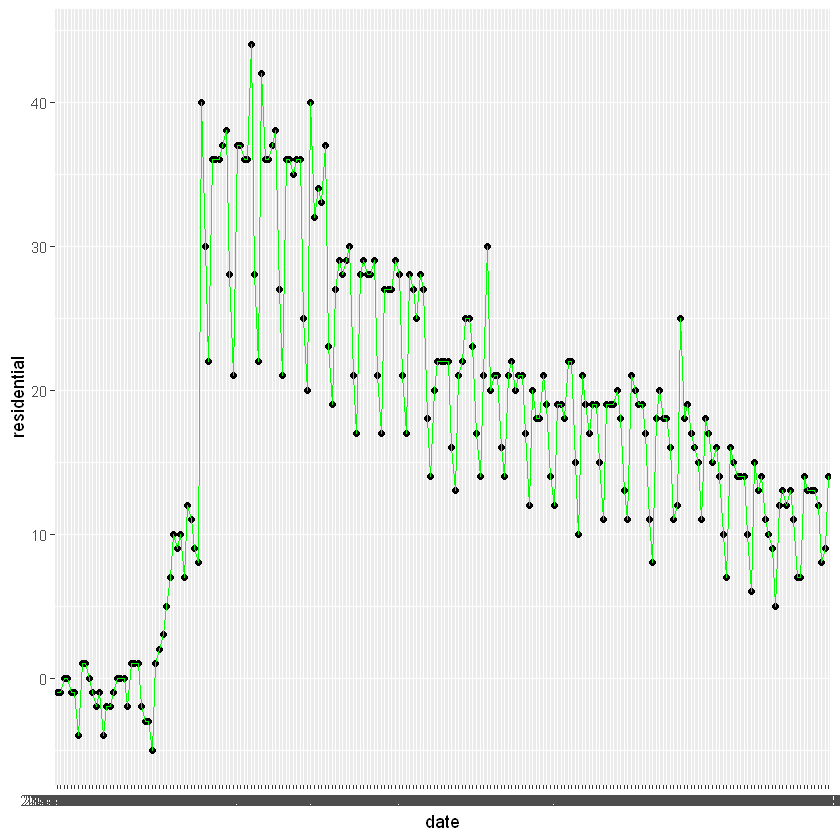

In [157]:
ggplot(data = mobility_western_cape, 
       mapping = aes(x =  date, 
                     y = workplaces)
      ) + 
  geom_point() +
  geom_line(aes(group=1),color='blue')

ggplot(data = mobility_western_cape, 
       mapping = aes(x =  date, 
                     y = residential)
      ) + 
  geom_point() +
  geom_line(aes(group=1),color='green')


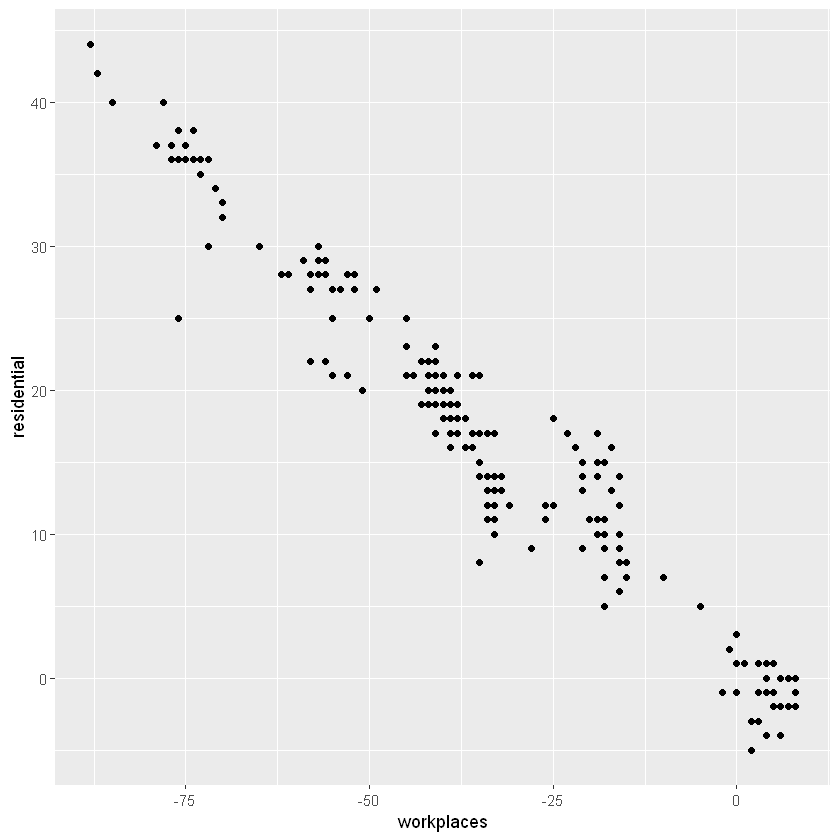

In [158]:
ggplot(mobility_western_cape, aes(x=workplaces , y=residential ))+ geom_point()

### Western Cape K-means Data set 

In [160]:
mobility_Kmeans_Western_Cape<- sqldf("SELECT residential, workplaces
FROM mobility
where province like '%Western Cape%' 
Order by date")

head(mobility_Kmeans_Western_Cape)

,residential,workplaces
,<dbl>,<dbl>
1,-1,0
2,-1,-2
3,0,4
4,0,4
5,-1,4
6,-1,3


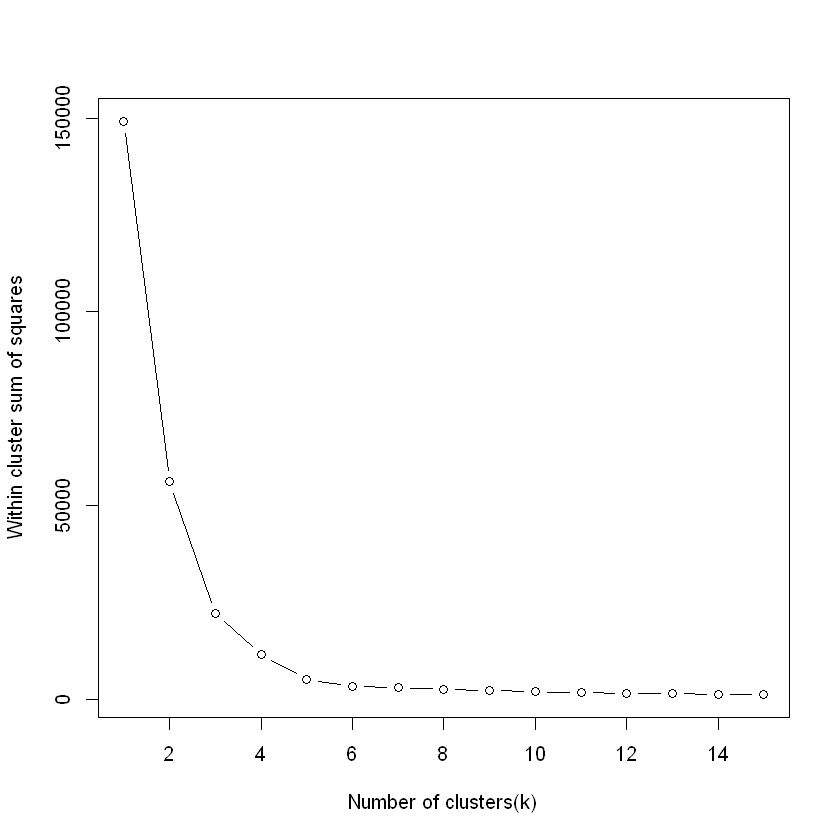

In [161]:

k.max <- 15
wss<- sapply(1:k.max,function(k){kmeans(mobility_Kmeans_Western_Cape,k,nstart = 20,iter.max = 20)$tot.withinss})
plot(1:k.max,wss, type= "b", xlab = "Number of clusters(k)",
     ylab = "Within cluster sum of squares")

#### Using a 5 cluster centroid on the data seems optimal.  



In [162]:
set.seed(72)
k_means2 <- kmeans(mobility_Kmeans_Western_Cape, centers = 5, nstart = 20)
print(k_means2)

K-means clustering with 5 clusters of sizes 28, 32, 30, 42, 88

Cluster means:
  residential workplaces
1    36.14286  -76.03571
2    -0.62500    3.43750
3    26.73333  -56.00000
4    11.26190  -18.76190
5    17.88636  -38.34091

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   2   2   2   2   2   2   2   2   2   2   2   4   4   4   4   4   4   4   4 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  5   1   3   3   1   1   1   1   1   3   3   1   1   1   1   1   3   3   1   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   1   1   3   3   1   1   1   1   1   3   3   1   1   1   1   1   5   5   3 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  3   3   3   3   5   

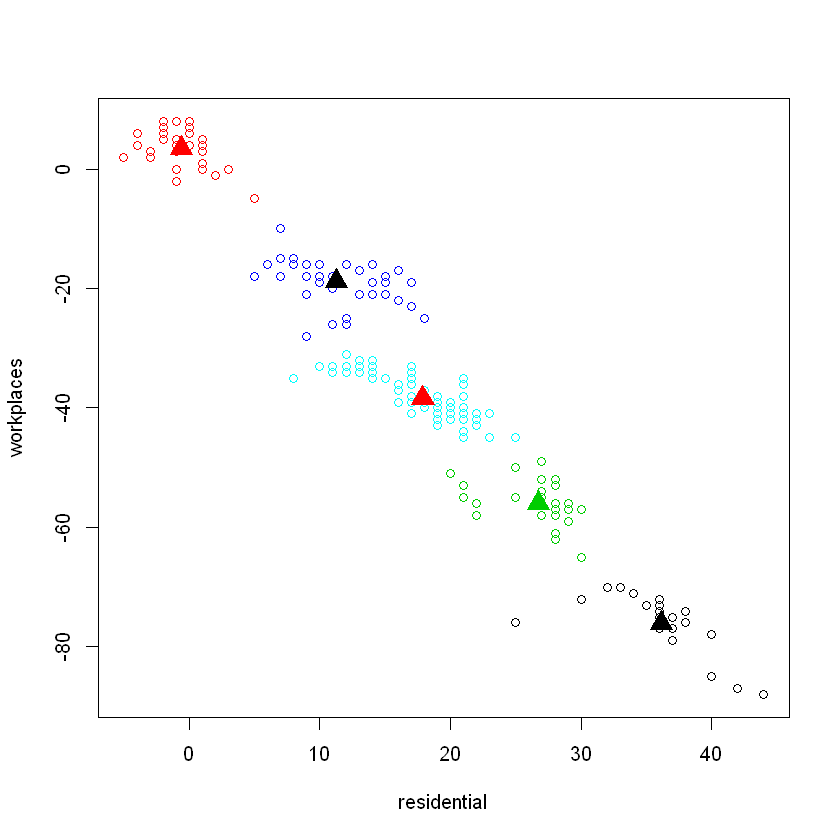

In [163]:
plot(mobility_Kmeans_Western_Cape, col=k_means2$cluster)
points(k_means2$centers[,c("residential", "workplaces")], col=1:3, pch=17, cex=2)

### Interpretation

Essentially, between_SS measures the variation between all clusters. The larger the between_SS value is the higher percentage the (between_SS / total_SS =  96.6 %) metric will have. So here we can see that the model is quite accurate with a score of 96.6 %. This means that between_SS is a large value. This means that the clusters are far separatd from eachother and that the model predicted the classes well.

The K-means program found 5 clusters in Western Cape when we look at residential movement vs workplaces movement. We can also see that there is more of a negative linear relationship between residential and workplaces movements in this province. So people in Western Cape usually have work places that are  more separated from residential places or the Western Cape has had more severe lockdowns. Also from the prior graphes we can see that there hase been a clear separation of residential(+) and workplaces(-) from the basis point of 0% on 15/02/2020 similar to the trend in Gauteng. This shows that there has been more of a movement away from traditional workplaces and more people are at home. This might be to a rise in unemplyment or just the lockdown level changing over time from level 5 to level 1. The most interesting thing in this data is that the Western Cape clearly has 5 clusters, which is less than Gauteng. These clusters are more evenly distributed and the majority of the data points lie in the center(this is some sort of indication of a trend or pattern). This shows that there is a tendency in Western Cape for economic activity to change more due to COVID because there is more of a centralisation around +20% to 10% change for residential and around -20% to -40% change in workplaces movement. The Western Cape seems to be in a slower recovery.

### Relating the finding Between Gauteng and Western Cape 

It seems that because of the cluster placement differences and cluster value differences as stated before , that the Western Cape is on a slower recovery path when it comes to workplace movement normalising vs Gauteng's more near 0% change in movement data. The reasons for this isnt clear and further investigations are needed to determine causality. Looking to the future , this data can help us reach some logical conclusions about future economic implications

# Conclusion

From stated above it seems that different parts of the country's population reacts differntly to the impact of COVID on their professional lives. This has lead to the conclusion of 2 possible cases. 

Case 1: The Western Cape has a slower economic recovery and will experience more of a prolonged negative Economic impact. This might lead to prolonged unemployment there and changes in wealth distributions in the population and even changes in property prices when one looks at business developments that might have less demand and more of a demand for residential dwelings. People are not returning to work as much as in Gauteng. Gauteng has still been hit hard but there seems to be more of a trend to the basis of 0% movement like back in 15/02/2020.

Case 2: The Western Cape could easily implement a work from home scheme because the Western Cape is not as industrially focused as Gauteng. The Western Cape has more of a tech/service based structure that is more decentralised vs the needed centralised industrial work structures like in Gauteng. 

From this one can make 2 predictions. 

Prediction 1: Gauteng will recover faster than the Western Cape from COVID in an economic sense.

Prediction 2: The Western Cape has more of a distributed resiliant network structure to their economy. So the Western Cape will be better positioned to handle economic shocks of the COVID nature in the future.

It is clear that there seems to be interesting clusters in the data that K-means identified. There are patterns to be identified and frameworks that could be formulated from this. This can help us better understand the impact of pandemics sothat we can build solutions or make better predictions in times of uncertainty. More investigation is needed on these trends.